In [1]:
import numpy as np 
import os 
import pandas as pd

In [17]:
class AdalineSGD(object):
    """ADAptive Linear Neuron Classifier

    Parameters
    ----------
    eta : float (Learning rate between 0.0 and 1.0)
    n_iter: int (passes over the training dataset)
    shuffle: bool (default:True)
    Shuffles training data every epoch if True to prevent cycles.
    random_state: int (Random number generator seed for random weight initiatization)

    Attributes
    ----------
    w_: 1d-array (Weights after fitting)
    cost_: list (Sum-of-squares cost function value averageed over all training examples in each epoch)

    """
    def __init__(self,eta=0.01,n_iter=10, shuffle=True,random_state=None):
        self.eta = eta
        self.n_iter = n_iter
        self.w_initialized = False
        self.shuffle = shuffle
        self.random_state = random_state

    def fit(self,X,y):
        """Fit training data.

        Parameters
        ----------
        X: {array-like}, shape = [n_examples,n_features]
        y: array-like, shape = [n_examples]

        Returns
        -------
        self: object
        """
        self._initialize_weights(X.shape[1])
        self.cost_ = []
        for i in range (self.n_iter):
            if self.shuffle:
                X,y = _shuffle(X,y)
            cost = []
            for xi,target in zip(X,y):
                cost.append(self._update_weights(xi,target))
                avg_cost = sum(cost) / len(y)
                self.cost_.append(avg_cost)
        return self

    def fit(self, X, y):
        """ Fit training data.

        Parameters
        ----------
        X : {array-like}, shape = [n_examples, n_features]
          Training vectors, where n_examples is the number of examples and
          n_features is the number of features.
        y : array-like, shape = [n_examples]
          Target values.

        Returns
        -------
        self : object

        """
        rgen = np.random.RandomState(self.random_state)
        self.w_ = rgen.normal(loc=0.0, scale=0.01, size=1 + X.shape[1])
        self.cost_ = []

        for i in range(self.n_iter):
            net_input = self.net_input(X)
            # Please note that the "activation" method has no effect
            # in the code since it is simply an identity function. We
            # could write `output = self.net_input(X)` directly instead.
            # The purpose of the activation is more conceptual, i.e.,  
            # in the case of logistic regression (as we will see later), 
            # we could change it to
            # a sigmoid function to implement a logistic regression classifier.
            output = self.activation(net_input)
            errors = (y - output)
            self.w_[1:] += self.eta * X.T.dot(errors)
            self.w_[0] += self.eta * errors.sum()
            cost = (errors**2).sum() / 2.0
            self.cost_.append(cost)
        return self

    def _shuffle(self,X,y):
        """Shuffle training data"""
        r = self.rgen.permutation(len(y))
        return X[r],y[r]

    def _initialize_weights(self,m):
        """Initialize weights to small random numbers"""
        self.rgen = np.random.RandomState(self.random_state)
        self.w_ = self.rgen.normal(loc=0.0,scale = 0.01, size = 1+m)
        self.w_initialized = True

    def _update_weights(self, xi, target):
        """Apply Adaline learning rule to update the weights"""
        output = self.activation(self.net_input(xi))
        error = (target - output)
        self.w_[1:] += self.eta * xi.dot(error)
        self.w_[0] += self.eta * error
        cost = 0.5 * error**2
        return cost

    def net_input(self,X):
        """Calculate net input"""
        return np.dot(X,self.w_[1:]) + self.w_[0]

    def activation(self,X):
        """Compute linear activation"""
        return X

    def predict(self,X):
        """Return class label after unit step"""
        return np.where(self.activation(self.net_input(X)) >= 0.0,1,-1)




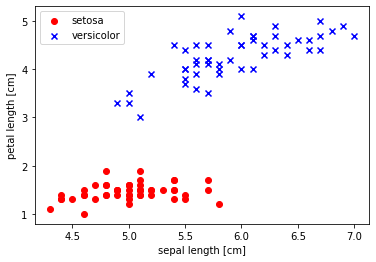

In [22]:
%matplotlib inline
import matplotlib.pyplot as plt
s= 'https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data'
df = pd.read_csv(s,header=None, encoding='utf-8')
#df.tail()

# select setosa and versicolor
y = df.iloc[0:100, 4].values
y = np.where(y == 'Iris-setosa', -1, 1)

# extract sepal length and petal length
X = df.iloc[0:100, [0, 2]].values

# plot data
plt.scatter(X[:50, 0], X[:50, 1],
            color='red', marker='o', label='setosa')
plt.scatter(X[50:100, 0], X[50:100, 1],
            color='blue', marker='x', label='versicolor')

plt.xlabel('sepal length [cm]')
plt.ylabel('petal length [cm]')
plt.legend(loc='upper left')

# plt.savefig('images/02_06.png', dpi=300)
plt.show()

In [26]:
from matplotlib.colors import ListedColormap
def plot_decision_regions(X, y, classifier, resolution=0.02):

    # setup marker generator and color map
    markers = ('s', 'x', 'o', '^', 'v')
    colors = ('red', 'blue', 'lightgreen', 'gray', 'cyan')
    cmap = ListedColormap(colors[:len(np.unique(y))])

    # plot the decision surface
    x1_min, x1_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    x2_min, x2_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, resolution),
                           np.arange(x2_min, x2_max, resolution))
    Z = classifier.predict(np.array([xx1.ravel(), xx2.ravel()]).T)
    Z = Z.reshape(xx1.shape)
    plt.contourf(xx1, xx2, Z, alpha=0.3, cmap=cmap)
    plt.xlim(xx1.min(), xx1.max())
    plt.ylim(xx2.min(), xx2.max())

    # plot class examples
    for idx, cl in enumerate(np.unique(y)):
        plt.scatter(x=X[y == cl, 0], 
                    y=X[y == cl, 1],
                    alpha=0.8, 
                    c=colors[idx],
                    marker=markers[idx], 
                    label=cl, 
                    edgecolor='black')

In [29]:
X_std = np.copy(X)
X_std[:, 0] = (X[:, 0] - X[:, 0].mean()) / X[:, 0].std()
X_std[:, 1] = (X[:, 1] - X[:, 1].mean()) / X[:, 1].std()

In [30]:
ada_sgd = AdalineSGD(n_iter=15, eta = 0.01, random_state=1)
ada_sgd.fit(X_std,y)

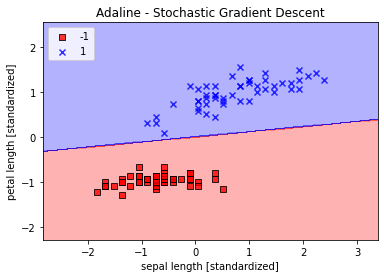

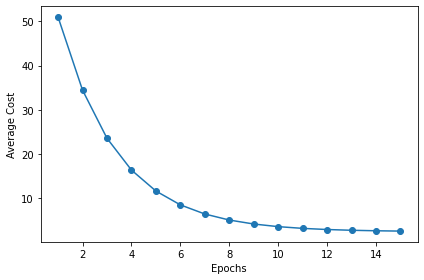

In [31]:
plot_decision_regions(X_std,y,classifier=ada_sgd)
plt.title('Adaline - Stochastic Gradient Descent')
plt.xlabel('sepal length [standardized]')
plt.ylabel('petal length [standardized]')
plt.legend(loc="upper left")
plt.show()

plt.plot(range(1,len(ada_sgd.cost_)+1), ada_sgd.cost_, marker='o')
plt.xlabel('Epochs')
plt.ylabel('Average Cost')
plt.tight_layout()
plt.show()
